In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import euclidean, minkowski, cityblock
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [3]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")
df = df.drop('Ubezp.', axis=1)

d_euc = euclidean(df.loc['A'], df.loc['B'])
print(f"Odległość euklidesowa: {d_euc}")

df['Zarobki (tys.)'] = df["Zarobki (tys.)"] * 1000
df.rename(columns={"Zarobki (tys.)": "Zarobki (zł)"}, inplace=True)
d_euc_zarobki = euclidean(df.loc['A'], df.loc['B'])
print(f"Odległość euklidesowa po przeskalowaniu zarobków: {d_euc_zarobki}")

df_std_for_distances = df.copy()
for col in df_std_for_distances.columns:
    if df_std_for_distances[col].std() != 0:
        df_std_for_distances[col] = df_std_for_distances[col] / df_std_for_distances[col].std()
d_euc_std = euclidean(df_std_for_distances.loc['A'], df_std_for_distances.loc['B'])
print(f"Odległość euklidesowa po standaryzacji (przez odchylenie standardowe): {d_euc_std}")

d_minkowski_std = minkowski(df_std_for_distances.loc['A'], df_std_for_distances.loc['B'])
print(f"Odległość Minkowskiego dla danych standaryzowanych: {d_minkowski_std}")

d_manhattan_std = cityblock(df_std_for_distances.loc['A'], df_std_for_distances.loc['B'])
print(f"Odległość miejska (Manhattan) dla danych standaryzowanych: {d_manhattan_std}")

Odległość euklidesowa: 30.604574821421714
Odległość euklidesowa po przeskalowaniu zarobków: 800.5847862656397
Odległość euklidesowa po standaryzacji (przez odchylenie standardowe): 4.000000000000001
Odległość Minkowskiego dla danych standaryzowanych: 4.000000000000001
Odległość miejska (Manhattan) dla danych standaryzowanych: 11.313708498984763


## Zadanie 2

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [4]:
film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"
films = [film1, film2, film3]

print("a)")
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(films)
print("Wektorowa reprezentacja filmów (CountVectorizer):")
print(X.toarray())
print("Nazwy cech (słowa):")
print(vectorizer.get_feature_names_out())

print("\nb)")
cosine_sim_matrix = cosine_similarity(X)
print("Macierz podobieństwa cosinusowego:")
print(cosine_sim_matrix)

print("\nc)")
similarities = []
for i in range(len(films)):
    for j in range(i + 1, len(films)):
        similarities.append((cosine_sim_matrix[i, j], f"Film {i+1} - Film {j+1}"))
similarities.sort(key=lambda x: x[0], reverse=True)
print("Podobieństwa między parami filmów:")
for sim, pair in similarities:
    print(f"{pair}: {sim:.4f}")
most_similar = similarities[0]
least_similar = similarities[-1]
print(f"Najbardziej podobne filmy: {most_similar[1]} (podobieństwo: {most_similar[0]:.4f})")
print(f"Najmniej podobne filmy: {least_similar[1]} (podobieństwo: {least_similar[0]:.4f})")

print("\nd)")
film4 = "rakieta mars astronauta czerwona planeta"
films_with_4 = [film1, film2, film3, film4]
X_with_4 = vectorizer.fit_transform(films_with_4)
cosine_sim_matrix_with_4 = cosine_similarity(X_with_4)
print("Macierz podobieństwa cosinusowego z Film 4:")
print(cosine_sim_matrix_with_4)
similarities_film4 = []
for i in range(len(films_with_4) - 1):
    similarities_film4.append((cosine_sim_matrix_with_4[3, i], f"Film 4 - Film {i+1}"))
similarities_film4.sort(key=lambda x: x[0], reverse=True)
print("Podobieństwa Film 4 z innymi filmami:")
for sim, pair in similarities_film4:
    print(f"{pair}: {sim:.4f}")
most_similar_to_film4 = similarities_film4[0]
print(f"Film 4 jest najbardziej podobny do: {most_similar_to_film4[1].split(" - ")[1]} (podobieństwo: {most_similar_to_film4[0]:.4f})")

a)
Wektorowa reprezentacja filmów (CountVectorizer):
[[1 1 0 0 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 1]]
Nazwy cech (słowa):
['astronauta' 'kosmiczna' 'krew' 'księżyc' 'misja' 'mroczny' 'noc' 'obca'
 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']

b)
Macierz podobieństwa cosinusowego:
[[1.  0.4 0. ]
 [0.4 1.  0. ]
 [0.  0.  1. ]]

c)
Podobieństwa między parami filmów:
Film 1 - Film 2: 0.4000
Film 1 - Film 3: 0.0000
Film 2 - Film 3: 0.0000
Najbardziej podobne filmy: Film 1 - Film 2 (podobieństwo: 0.4000)
Najmniej podobne filmy: Film 2 - Film 3 (podobieństwo: 0.0000)

d)
Macierz podobieństwa cosinusowego z Film 4:
[[1.  0.4 0.  0.4]
 [0.4 1.  0.  0.4]
 [0.  0.  1.  0. ]
 [0.4 0.4 0.  1. ]]
Podobieństwa Film 4 z innymi filmami:
Film 4 - Film 1: 0.4000
Film 4 - Film 2: 0.4000
Film 4 - Film 3: 0.0000
Film 4 jest najbardziej podobny do: Film 1 (podobieństwo: 0.4000)


## Zadanie 3

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

1.
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

2.


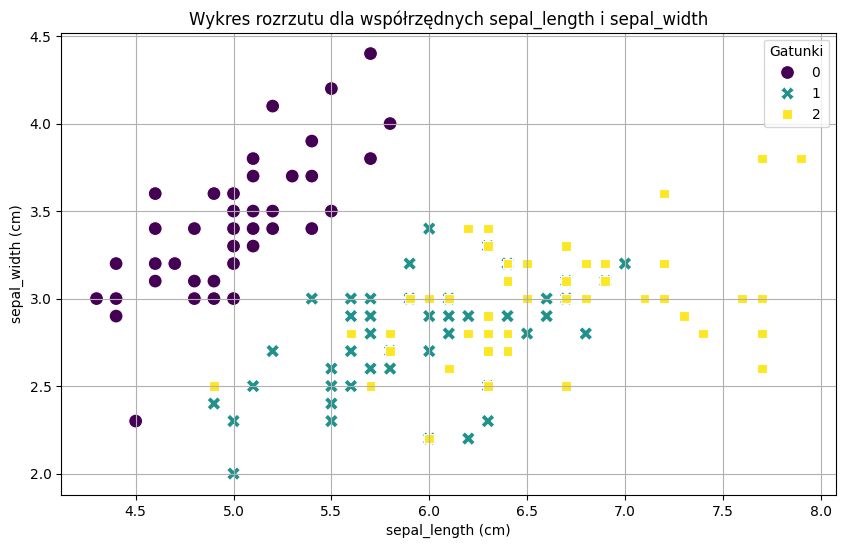


3.
Wartości minimalne dla atrybutów:
sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64
Wartości maksymalne dla atrybutów:
sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64
Średnie odchylenie standardowe dla atrybutów:
sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

4.
Macierz korelacji między atrybutami Iris:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

5.


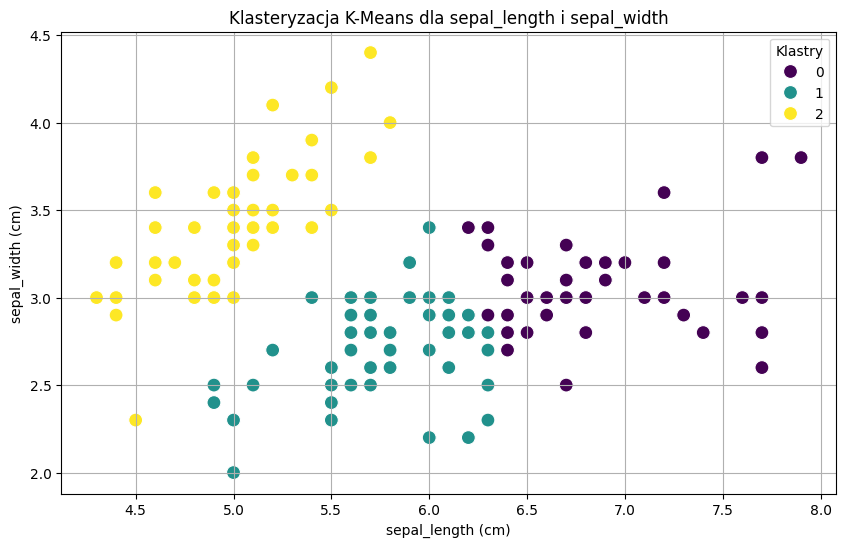


6.


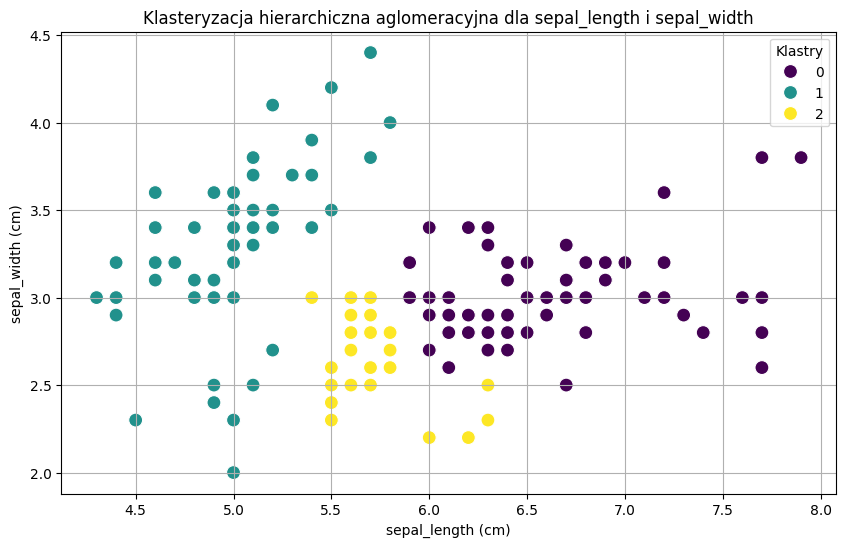

In [5]:
print("1.")
iris_data = datasets.load_iris(as_frame=True)
iris_features = iris_data.data
iris_target = iris_data.target
iris_features.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_target.name = 'species'
iris_df = pd.concat([iris_features, iris_target], axis=1)
print(iris_df.head())

print("\n2.")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    hue='species',
    style='species',
    data=iris_df,
    palette='viridis',
    s=100
)
plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')
plt.title('Wykres rozrzutu dla współrzędnych sepal_length i sepal_width')
plt.legend(title='Gatunki')
plt.grid(True)
plt.show()

print("\n3.")
numerical_cols = iris_df.drop(columns=['species'])
min_values = numerical_cols.min()
max_values = numerical_cols.max()
std_dev_values = numerical_cols.std()
print("Wartości minimalne dla atrybutów:")
print(min_values)
print("Wartości maksymalne dla atrybutów:")
print(max_values)
print("Średnie odchylenie standardowe dla atrybutów:")
print(std_dev_values)

print("\n4.")
correlation_matrix = numerical_cols.corr()
print("Macierz korelacji między atrybutami Iris:")
print(correlation_matrix)

print("\n5.")
iris_sepal = iris_df[['sepal_length', 'sepal_width']].copy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(iris_sepal)
iris_sepal['cluster_kmeans'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    hue='cluster_kmeans',
    data=iris_sepal,
    palette='viridis',
    s=100,
    legend='full'
)
plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')
plt.title('Klasteryzacja K-Means dla sepal_length i sepal_width')
plt.legend(title='Klastry')
plt.grid(True)
plt.show()

print("\n6.")
iris_sepal_agg = iris_df[['sepal_length', 'sepal_width']].copy()
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(iris_sepal_agg)
iris_sepal_agg['cluster_agg'] = agg_clustering.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    hue='cluster_agg',
    data=iris_sepal_agg,
    palette='viridis',
    s=100,
    legend='full'
)
plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')
plt.title('Klasteryzacja hierarchiczna aglomeracyjna dla sepal_length i sepal_width')
plt.legend(title='Klastry')
plt.grid(True)
plt.show()

## Zadanie 4
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

1.
Sprawdzenie czy w zbiorze są brakujące dane:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Zbiór po usunięciu brakujących danych:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex 

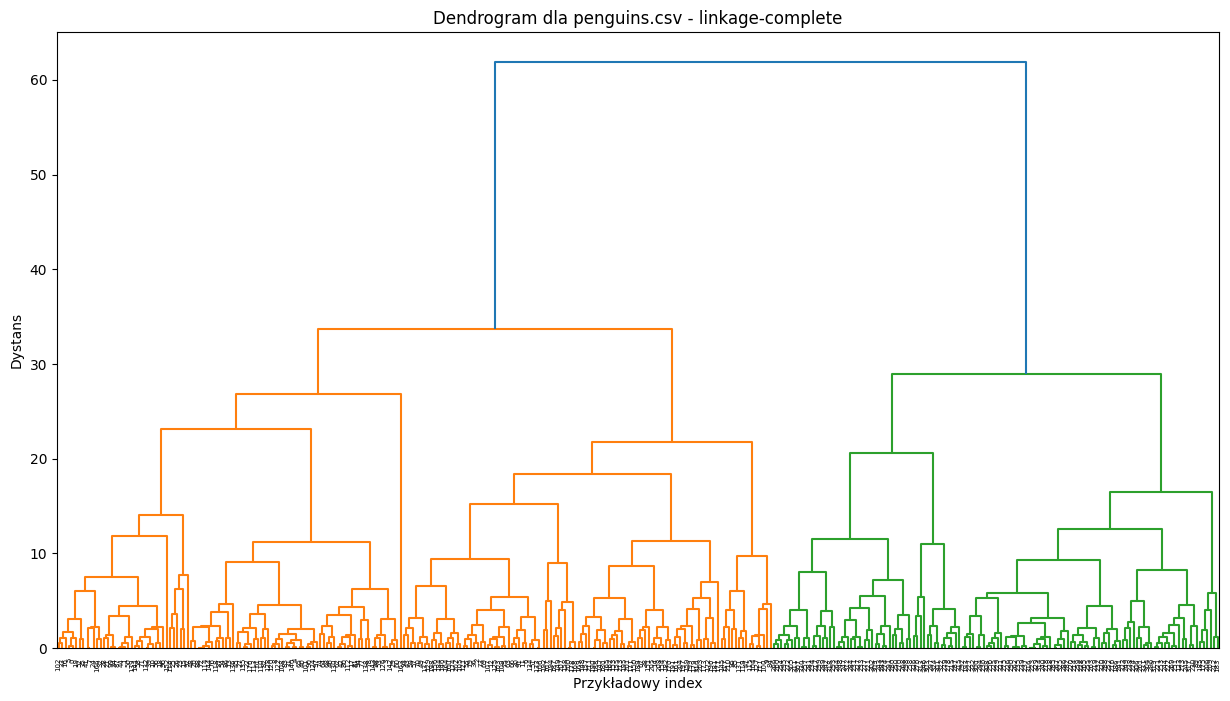

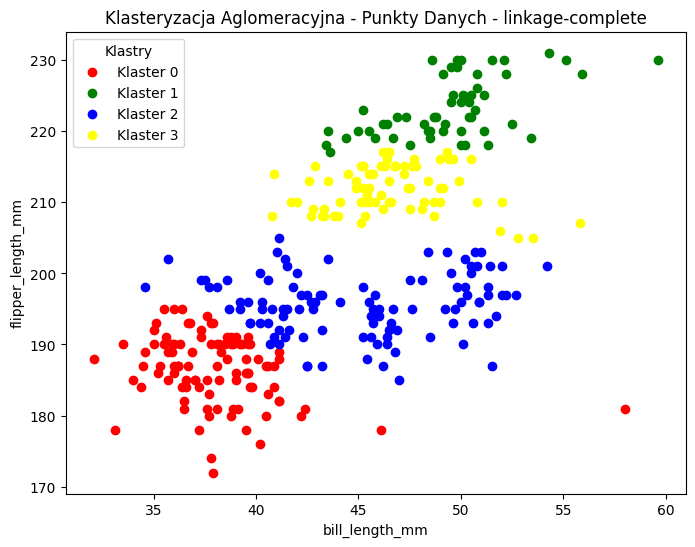


3. 4. 5. average


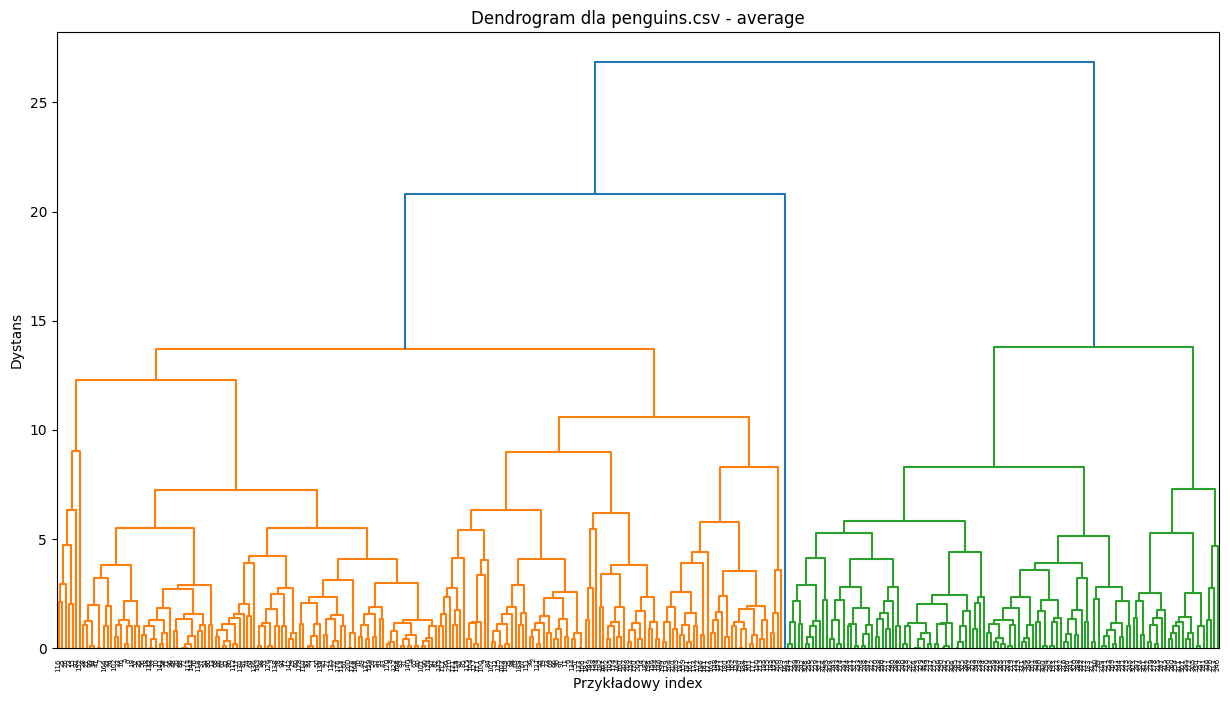

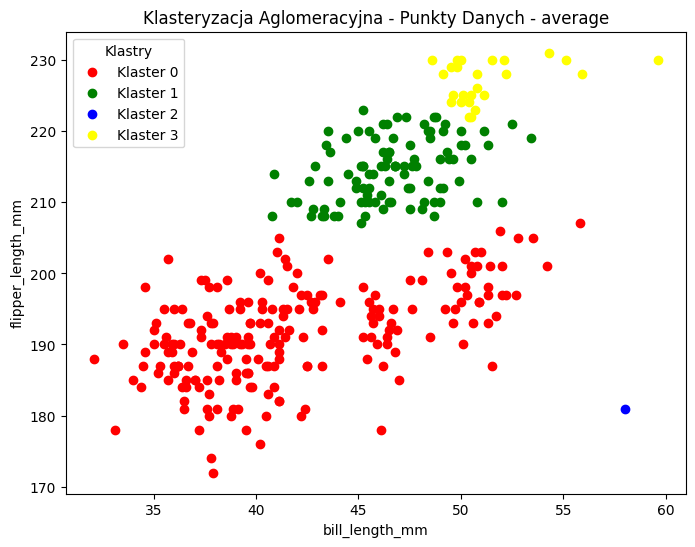


3. 4. 5. single


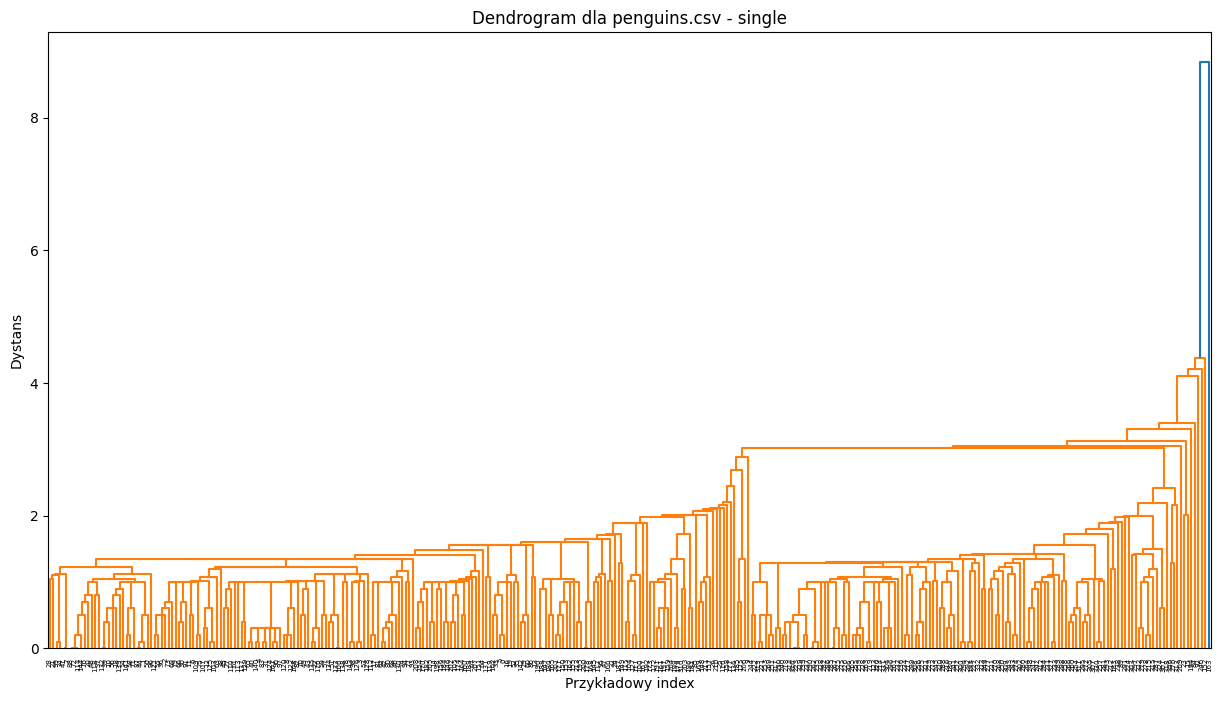

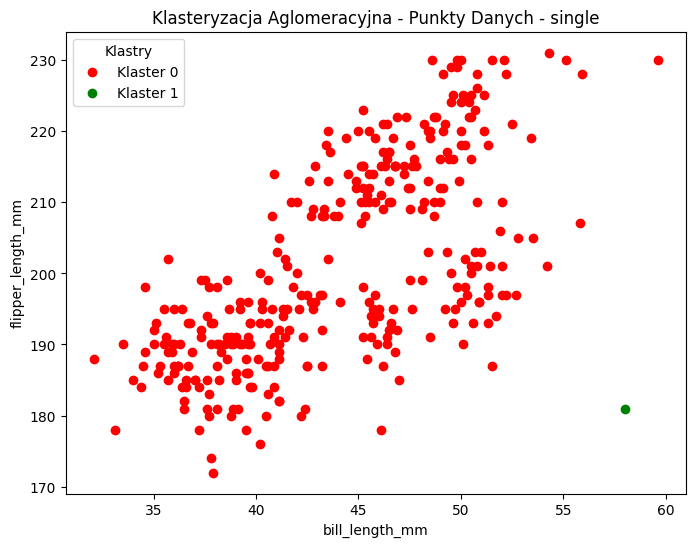


3. 4. 5. ward


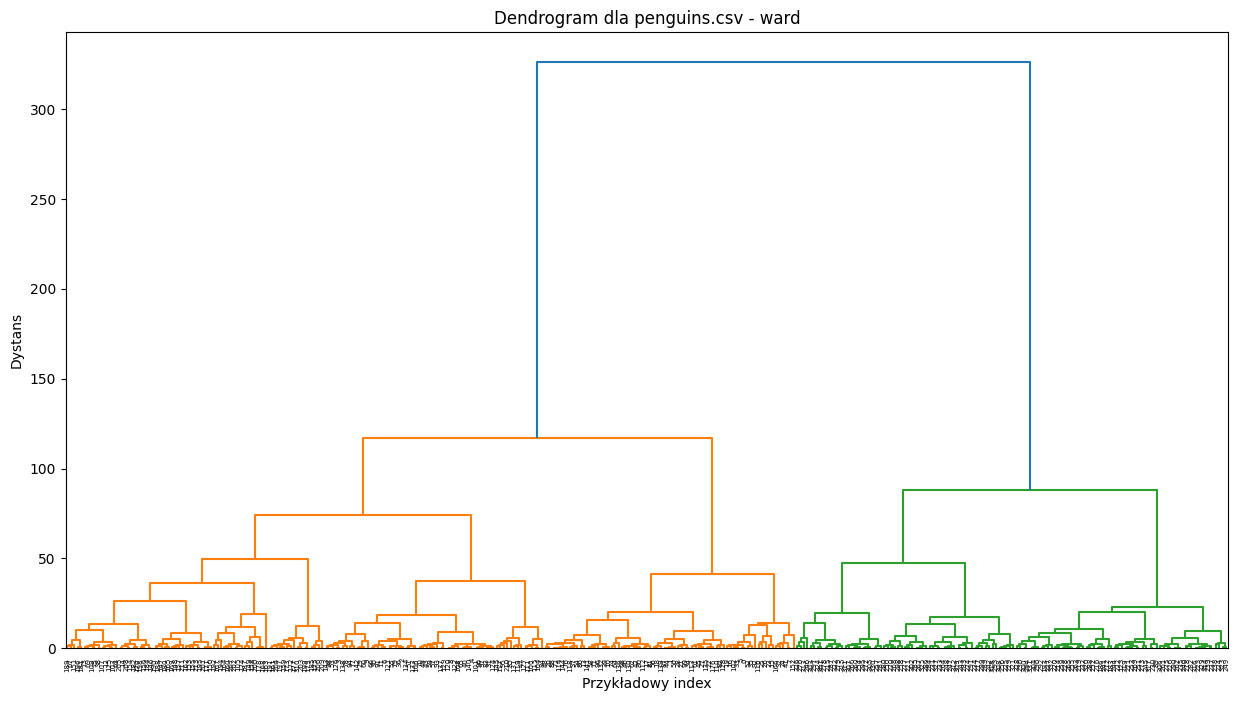

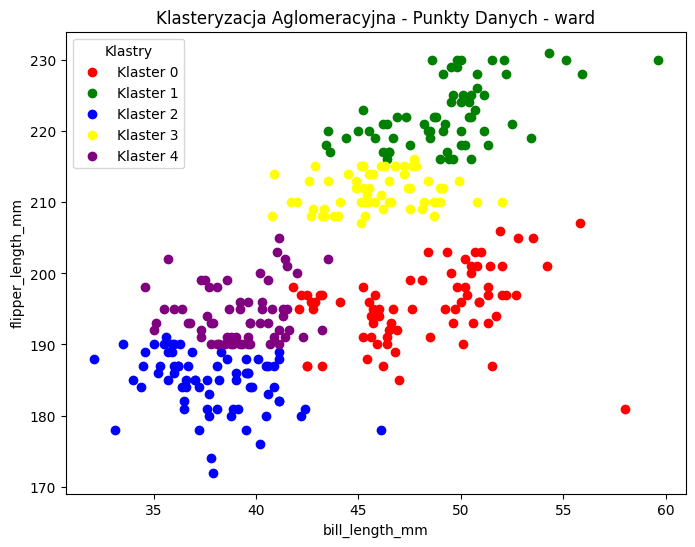

In [27]:
penguins_df = pd.read_csv('penguins.csv')
penguins_df.info()
penguins_df.describe()

print("\n1.")
print("Sprawdzenie czy w zbiorze są brakujące dane:")
print(penguins_df.isnull().sum())
penguins_df.dropna(inplace=True)
print("Zbiór po usunięciu brakujących danych:")
print(penguins_df.isnull().sum())

print("\n2.")
penguins_bill_flipper_length = penguins_df[['bill_length_mm', 'flipper_length_mm']].copy()
print(penguins_bill_flipper_length.head())

print("\n3. 4. 5. linkage-complete")
linked_complete = linkage(penguins_bill_flipper_length, method='complete')
plt.figure(figsize=(15, 8))
dendrogram(linked_complete, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram dla penguins.csv - linkage-complete')
plt.xlabel('Przykładowy index')
plt.ylabel('Dystans')
plt.show()
colors = ['red', 'green', 'blue', 'yellow']
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
cluster.fit(penguins_bill_flipper_length)
plt.figure(figsize=(8, 6))
for cluster_id, color in zip(range(len(colors)), colors):
    cluster_points = penguins_bill_flipper_length[cluster.labels_ == cluster_id]
    plt.scatter(cluster_points['bill_length_mm'], cluster_points['flipper_length_mm'], color=color, label=f'Klaster {cluster_id}')
plt.title('Klasteryzacja Aglomeracyjna - Punkty Danych - linkage-complete')
plt.xlabel('bill_length_mm')
plt.ylabel('flipper_length_mm')
plt.legend(title="Klastry")
plt.show()

print("\n3. 4. 5. average")
linked_complete = linkage(penguins_bill_flipper_length, method='average')
plt.figure(figsize=(15, 8))
dendrogram(linked_complete, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram dla penguins.csv - average')
plt.xlabel('Przykładowy index')
plt.ylabel('Dystans')
plt.show()
colors = ['red', 'green', 'blue', 'yellow']
cluster = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean')
cluster.fit(penguins_bill_flipper_length)
plt.figure(figsize=(8, 6))
for cluster_id, color in zip(range(len(colors)), colors):
    cluster_points = penguins_bill_flipper_length[cluster.labels_ == cluster_id]
    plt.scatter(cluster_points['bill_length_mm'], cluster_points['flipper_length_mm'], color=color, label=f'Klaster {cluster_id}')
plt.title('Klasteryzacja Aglomeracyjna - Punkty Danych - average')
plt.xlabel('bill_length_mm')
plt.ylabel('flipper_length_mm')
plt.legend(title="Klastry")
plt.show()

print("\n3. 4. 5. single")
linked_complete = linkage(penguins_bill_flipper_length, method='single')
plt.figure(figsize=(15, 8))
dendrogram(linked_complete, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram dla penguins.csv - single')
plt.xlabel('Przykładowy index')
plt.ylabel('Dystans')
plt.show()
colors = ['red', 'green']
cluster = AgglomerativeClustering(n_clusters=2, linkage='single', metric='euclidean')
cluster.fit(penguins_bill_flipper_length)
plt.figure(figsize=(8, 6))
for cluster_id, color in zip(range(len(colors)), colors):
    cluster_points = penguins_bill_flipper_length[cluster.labels_ == cluster_id]
    plt.scatter(cluster_points['bill_length_mm'], cluster_points['flipper_length_mm'], color=color, label=f'Klaster {cluster_id}')
plt.title('Klasteryzacja Aglomeracyjna - Punkty Danych - single')
plt.xlabel('bill_length_mm')
plt.ylabel('flipper_length_mm')
plt.legend(title="Klastry")
plt.show()

print("\n3. 4. 5. ward")
linked_complete = linkage(penguins_bill_flipper_length, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linked_complete, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram dla penguins.csv - ward')
plt.xlabel('Przykładowy index')
plt.ylabel('Dystans')
plt.show()
colors = ['red', 'green', 'blue', 'yellow', 'purple']
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
cluster.fit(penguins_bill_flipper_length)
plt.figure(figsize=(8, 6))
for cluster_id, color in zip(range(len(colors)), colors):
    cluster_points = penguins_bill_flipper_length[cluster.labels_ == cluster_id]
    plt.scatter(cluster_points['bill_length_mm'], cluster_points['flipper_length_mm'], color=color, label=f'Klaster {cluster_id}')
plt.title('Klasteryzacja Aglomeracyjna - Punkty Danych - ward')
plt.xlabel('bill_length_mm')
plt.ylabel('flipper_length_mm')
plt.legend(title="Klastry")
plt.show()